In [164]:
import sys
import numpy as np
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
from collections import Counter
import collections
import operator, pprint
import matplotlib.pyplot as plt

In [2]:
def get_data(bulkjob):
    url = "https://api.diffbot.com/v3/bulk/data"
    querystring = {"token":"39fe7306d877081d7d2afb5f3781d13f","name": bulkjob} #,"num":"500"
    payload = ""
    headers = {
        'cache-control': "no-cache",
                }

    response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
    return response
    # print(response.text)

In [4]:
# fetch bulk retail data
response1 = get_data("bulk1")
response2 = get_data("bulk2")
response3 = get_data("bulk3")
response4 = get_data("bulk4")
response5 = get_data("bulk5")

In [6]:
# convert response to json list
response1_json = response1.json()
response2_json = response2.json()
response3_json = response3.json()
response4_json = response4.json()
response5_json = response5.json()

In [10]:
# function to merge json response
def append_list(list):
    for row in range(len(list)):
        complete_data.append(list[row])    

In [11]:
# append the datasets
complete_data = response1_json.copy()
append_list(response2_json)
append_list(response3_json)
append_list(response4_json)
append_list(response5_json)

In [13]:
# save the text data in a json dump
with open('/home/danyzix/Data/complete_json_text.txt', 'w') as json_file:  
    temp=json.dumps(complete_data)
    json_file.write(temp)
json_file.close()

In [3]:
# open the text data as a json object
with open('/home/danyzix/Data/complete_json_text.txt') as json_file:  
    data1 = json.load(json_file)
json_file.close()

In [59]:
# ad an extra column 'keys' that counts the number of columns
for row in range(len(data1)):
    data1[row].update({'keys': len(data1[row].keys())})

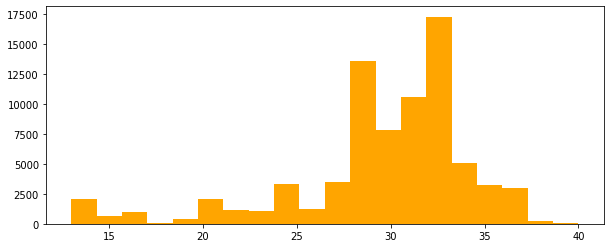

In [213]:
# plot the number of columns per url
key_count = []
for row in range(len(data1)):
    key_count.append(data1[row]['keys'])
plt.figure(figsize=(10,4))
plt.hist(key_count, bins=20, color='orange')
plt.show()

In [79]:
# Some useful functions:

# get a list of unique column names
def get_unique_columns(data):
    columns = []
    for row in range(len(data)):
        for key in data[row].keys():
            columns.append(key)
    unique_columns = set(columns)
    return unique_columns

# count urls with a certain column present
def count_urls_with_column(column, data):
    count = 0
    for row in range(len(data)):
        if column in data[row].keys():
            count += 1
    return count

# delete a dictinary key from a dataset
def delete_key(key, data):
    for row in range(len(data)):
        if key in data1_subset[row].keys():
            del data1_subset[row][key]
            
# get list of rows which has a particular column
def get_urls_with_column(column, data):
    urls = []
    for row in range(len(data)):
        if column in data[row].keys():
            urls.append(row)
    return urls

In [214]:
# subset urls which has less than a certain number of columns to inspect
low_keys=[]
for row in range(len(data1)):
    for key,value in data1[row].items():
        if key=='keys' and value<20:
            low_keys.append(data1[row])
len(low_keys)

4128

In [54]:
# list of unique column names 
print(get_unique_columns(data1))

{'cspecs', 'text', 'diffbotUri', 'docId', 'flixProductID', 'productId', 'flixMinisiteButton4', 'productOrigin', 'pageUrl', 'lastCrawlTimeUTC', 'seedUrlHash32', 'timestamp', 'type', 'breadcrumb', 'flixMinisiteButton1', 'normalizedSpecs', 'prefixCode', 'saveAmountDetails', 'flixMinisiteButtonA', 'flixLoaderPresent', 'flixMinisiteButton2', 'flixMinisiteButtonC', 'is_boxed', 'priceRange', 'saveAmount', 'isbn', 'gburl', 'quantityPrices', 'offerPrice', 'specs', 'flixMinisiteButtonB', 'resolvedPageUrl', 'sku', 'category', 'mpn', 'brand', 'test', 'flixMinisiteButton3', 'parentUrlDocId', 'discussion', 'offerPriceDetails', 'flixHotspotPresent', 'title', 'flixMPN', 'regularPrice', 'images', 'multipleProducts', 'flixMinisitePresent', 'humanLanguage', 'flixEAN', 'flixInpagePresent', 'regularPriceDetails', 'availability', 'upc'}


In [58]:
# number of unique columns
len(get_unique_columns(data1))

54

In [220]:
count_urls_with_column('pageUrl', data1_subset), count_urls_with_column('text', data1_subset)

(77535, 62530)

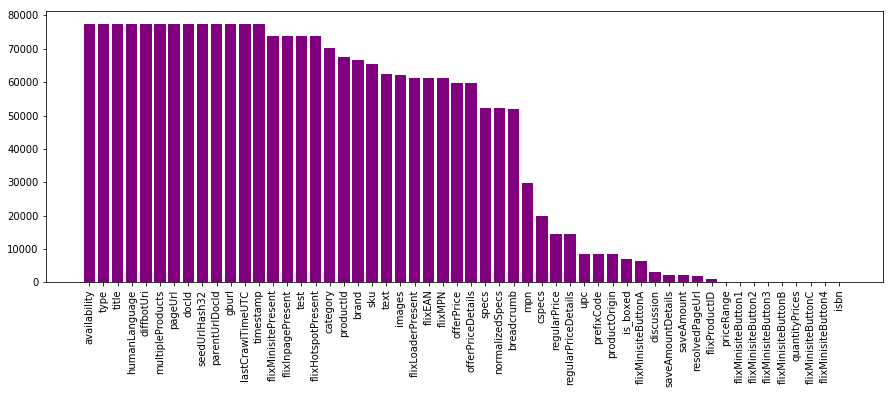

In [61]:
# plot the column data count in descending order
column_count = Counter(columns)
column_count_sorted_tuple = sorted(column_count.items(), key=lambda kv:kv[1], reverse=True) 
column_count_sorted = collections.OrderedDict(column_count_sorted_tuple)

plt.figure(figsize=(15,5))
plt.bar(column_count_sorted.keys(), column_count_sorted.values(), color='purple')
plt.xticks(rotation=90)
plt.show()

In [62]:
# list of bad columns - to be ignored
bad_columns = ['flixMinisiteButtonA','saveAmountDetails','flixMinisiteButton2','prefixCode','offerPrice','priceRange', 
               'parentUrlDocId','docId','humanLanguage','flixHotspotPresent', 'flixLoaderPresent','keys','regularPriceDetails',
               'flixMinisiteButtonB','flixMinisitePresent','images','flixInpagePresent','lastCrawlTimeUTC','is_boxed',
               'productOrigin','flixMinisiteButton4','flixMinisiteButton3','saveAmount','flixProductID','discussion',
               'flixMinisiteButtonC','diffbotUri','availability','type','resolvedPageUrl','seedUrlHash32','regularPriceDetails',
               'timestamp','flixMinisiteButton1','gburl','isbn','quantityPrices','multipleProducts','test','normalizedSpecs', 
              'offerPriceDetails','breadcrumb','regularPrice']

In [63]:
# list of columns to be used 
print([x for x in unique_columns if x not in bad_columns])

['cspecs', 'text', 'productId', 'pageUrl', 'specs', 'sku', 'category', 'mpn', 'brand', 'title', 'flixMPN', 'flixEAN', 'upc']


In [64]:
# subset data with without the bad columns
data1_subset = []
temp = []
for row in range(len(data1)):
    temp = dict((key,data1[row][key]) for key in data1[row].keys() if key not in bad_columns)
    data1_subset.append(temp)

In [65]:
# textify cspecs and add a new column with clean cspecs
for row in range(len(data1_subset)):
    if 'cspecs' in data1_subset[row].keys():
        cspecs = []
        for i in range(len(data1_subset[row]['cspecs'][0]['features'])):
            keys = []
            for key,value in data1_subset[row]['cspecs'][0]['features'][i].items():
                # remove new line \n
                value = value.splitlines() 
                # convert list to string
                value = " ".join(value).strip('-')   #.replace('-','') cam be used to replace hyphens if needed 
                keys.append(value)
            # convert list to a string and add a new line
            text = " ".join(keys) + '\n'
            cspecs.append(text)
        cspecs = " ".join(cspecs)
        data1_subset[row].update({'clean_cspecs': cspecs})
        
# textify specs and add a new column with clean specs
for row in range(len(data1_subset)):
    if 'specs' in data1_subset[row].keys():
        specs = []
        for key,value in data1_subset[row]['specs'].items():
            temp = (key,value)
            temp = " ".join(temp) + '\n'
            specs.append(temp)
        specs = " ".join(specs)
        data1_subset[row].update({'clean_specs': specs})

In [66]:
# lets remove the specs and cspecs columns from the data
delete_key('specs',data1_subset)
delete_key('cspecs',data1_subset)
print(get_unique_columns(data1_subset))

{'title', 'clean_cspecs', 'sku', 'category', 'flixMPN', 'mpn', 'brand', 'flixEAN', 'text', 'productId', 'pageUrl', 'clean_specs', 'upc'}


In [67]:
# reorder the data in the follwing order of the columns
desired_order_keys = ['title','pageUrl','category','brand','mpn','flixEAN','sku','flixMPN','upc','productId','clean_specs',
                     'clean_cspecs','text']
data1_subset_new = []
for row in range(len(data1_subset)):
    my_ordered_dict = collections.OrderedDict(data1_subset[row])
    for key in desired_order_keys:
        try:
            my_ordered_dict[key] = my_ordered_dict.pop(key)
        except KeyError: 
            pass    
    data1_subset_new.append(my_ordered_dict) 

In [68]:
# save the text data in a json dump
with open('/home/danyzix/Data/retail_hit_json.txt', 'w') as json_file:  
    temp=json.dumps(data1_subset_new)
    json_file.write(temp)
json_file.close()

In [69]:
# open the text data as a json object
with open('/home/danyzix/Data/retail_hit_json.txt') as json_file:  
    retail_hit = json.load(json_file)
json_file.close()

In [218]:
data1[30001]['specs']

{'50mm': '0.45', '58': 'E-58U', 'focal_length': '50mm', 'minimum_focusing_distance_m': '0.45', 'approx_weight_g': '290', 'compatible_with_extenders': 'No', 'mount_type': 'Canon EF', 'maximum_magnification_x': 'Number of Aperture Blades', 'manufacturer_warranty': '24 months', 'max_aperture': 'f/1.4', 'number_of_lens_groups': '6', '015': '8', 'number_of_aperture_blades': '8', 'minimum_aperture': '22', 'lens_cap': 'E-58U', 'number_of_lens_elements': '7', 'filter_size': '58MM'}

In [71]:
data1_subset_new[3001]

OrderedDict([('title', 'RING Spotlight Cam - White'),
             ('pageUrl',
              'https://www.currys.co.uk/gbuk/smart-tech/smart-tech/smart-home/smart-security-and-cctv/ring-spotlight-cam-white-10169983-pdt.html'),
             ('category', 'Jewelry & Watches'),
             ('flixEAN', ''),
             ('sku', '217135'),
             ('flixMPN', '10169983'),
             ('productId', '217135'),
             ('clean_specs',
              'colour White\n box_contents - Ring Spotlight Cam - Installation hardware - Quick install guide\n weight 1.7 kg\n manufacturers_guarantee 1 year\n dimensions 127 x 70 x 69 mm (H x W x D)\n'),
             ('clean_cspecs',
              "Type Smart security camera\n Compatibility  iOS  - Android  - Windows  - MacOS\n Compatible app Ring\n Smart compatibility  Samsung Smart Things  - ADT Pulse  - Wink\n Connectivity WiFi\n Power Mains\n 1. See, hear, and speak to anyone on your property from your phone, tablet, or PC\n 2.  Advanced motion d

In [73]:
for keys, values in retail_hit[-1].items():
    print(keys,':',values)

title : Intel Core i5-9400F Coffee Lake 6-Core 2.9 GHz &#40;4.10 GHz Turbo&#41; LGA 1151 &#40;300 Series&#41; 65W BX80684I59400F Desktop Processor Without Graphics - Newegg.com
pageUrl : https://www.newegg.com/intel-core-i5-9th-gen-core-i5-9400f/p/N82E16819117981
category : Computers
sku : 16819117981
productId : 16819117981
clean_specs : tdp 65 W
 base_clock_speed_ghz 2.9
 integrated_processor_graphics No
 chipset 300 Series (including Z390)
 platform_pci_express_lanes Up to 40
 memory_support Two channels DDR4-26662
 intel_smart_cache 9 MB
 coresthreads 6/6

clean_cspecs : Brand Intel
 Processors Type Desktop
 Series Core i5 9th Gen
 Name Core i5-9400F
 Model BX80684I59400F
 CPU Socket Type LGA 1151 (300 Series)
 Core Name Coffee Lake
 # of Cores 6-Core
 # of Threads 6
 Operating Frequency 2.9 GHz
 Max Turbo Frequency 4.1 GHz
 L3 Cache 9MB
 Manufacturing Tech 14nm
 64-Bit Support Yes
 Hyper-Threading Support No
 Memory Types DDR4 2666
 Memory Channel 2
 Virtualization Technology Supp

In [197]:
# %whos